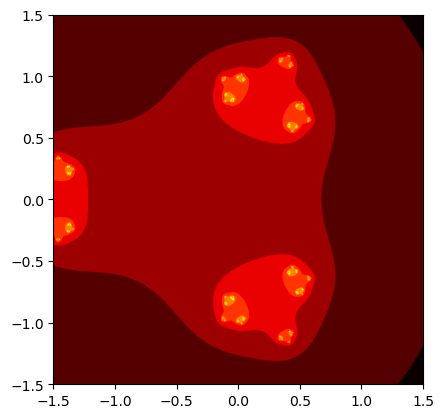

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(f, xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    img = np.zeros(Z.shape, dtype=float)
    ix, iy = np.indices(Z.shape)

    for i in range(max_iter):
        mask = np.abs(Z) < 1000
        Z[mask] = f(Z[mask])
        img[ix[mask], iy[mask]] += 1

    return img

lambda_value = 1  # Example lambda value
f = lambda z: lambda_value * z**3 + z**2 + lambda_value

fig, ax = plt.subplots()

# Function to update the Julia set
def update_julia(xmin, xmax, ymin, ymax):
    julia_img = julia_set(f, xmin, xmax, ymin, ymax, width, height, max_iter)
    ax.imshow(julia_img, extent=[xmin, xmax, ymin, ymax], cmap='hot', origin='lower')
    plt.draw()

# Event handler for mouse clicks
def on_click(event):
    if event.dblclick:
        x, y = event.xdata, event.ydata
        dx, dy = (xmax - xmin) / 4, (ymax - ymin) / 4
        update_julia(x-dx, x+dx, y-dy, y+dy)

# Connect the event handler
fig.canvas.mpl_connect('button_press_event', on_click)

# Initial plot
update_julia(xmin, xmax, ymin, ymax)
plt.show()
